In [1]:
from root_pandas import read_root
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
print(pd.__version__)
from scipy import stats

Welcome to JupyROOT 6.12/04
0.20.3


In [2]:
new_file_name = 'data15to16_13TeV_v18_afterCuts.root'
tree_name = 'tree_incl_all'

In [3]:
apply_cut(file_name='data15to16_13TeV_v18.root',
          new_file_name=new_file_name, 
          tree_name=tree_name,
          cuts = 'weight!=0 && pass_vtx4lCut==1')

In [3]:
f1 = 'data_13TeV_afterCuts.root'
f2 = new_file_name

In [8]:
def read(f1, f2):
    var_name = 'm4l_constrained_HM'
    variables = ['event', 'run', 'event_type', 'prod_type', 'prod_type_HM', 'm4l_constrained_HM', 'm4l_constrained']
    df1 = read_root(f1, tree_name, columns=variables)
    df2 = read_root(f2, tree_name, columns=variables)
    return df1, df2

In [34]:
def overlap_study(df1, df2, var_name, low, hi):
    f1_suffix = 'r20'
    f2_suffix = 'r21'
    
    # apply mass cut
    df1_in_mass_range = df1[(df1[var_name] >= low) & (df1[var_name] <= hi)]
    df2_in_mass_range = df2[(df2[var_name] >= low) & (df2[var_name] <= hi)]
    
    
    df_union = pd.merge(df1, df2, how='outer', on=['event', 'run'], indicator=True, suffixes=(f1_suffix, f2_suffix))
    only_f1 = df_union[df_union._merge == 'left_only']
    only_f2 = df_union[df_union._merge == 'right_only']
    common = df_union[df_union._merge == 'both']
    
    
    # find union of the two DF
    outer_set = pd.merge(df1_in_mass_range, df2_in_mass_range,\
                         how='outer', on=['event', 'run'], indicator=True)
    only_f1_ = outer_set[outer_set._merge == 'left_only']
    only_f2_ = outer_set[outer_set._merge == 'right_only']
    common_ = outer_set[outer_set._merge == 'both']
    
    summary_list = [common_.shape[0], only_f1_.shape[0], only_f2_.shape[0]]
    print("In the mass range [{}, {}] GeV: {} events in common, {} events only in {}, {} events only in {}.".format(
        low, hi,
        common_.shape[0],
        only_f1_.shape[0],
        f1_suffix,
        only_f2_.shape[0],
        f2_suffix
    ))
    summary = pd.Series(summary_list, index=['both', f1_suffix, f2_suffix], name='In Fraction')
    summary.plot.pie(autopct='%.2f', fontsize=20, figsize=(6, 6))
    
    print("There are {} events in total in *{}*".format(df1_in_mass_range.shape[0], f1_suffix))
    print("After moving to {}...".format(f2_suffix))
    # how many events in this range only in df1, but can be found elsewhere in df2.
    inner_f1_moved = pd.merge(only_f1_, df2, how='inner', on=['event', 'run'])
    print("{} events were lost in {} due to migrations".format(inner_f1_moved.shape[0], f2_suffix))
    if inner_f1_moved.shape[0] > 0:
        print(inner_f1_moved[['run', 'event']])
    
    # how many are in df1 but not in df2?
    inner_f1 = pd.merge(only_f1_, only_f1, how='inner', on=['event', 'run'])
    print("{} events were completely lost in {}".format(inner_f1.shape[0], f2_suffix))
    if inner_f1.shape[0] > 0:
        print(inner_f1[['run', 'event']])
    
    # how many events in this range only in f2, but can be found elsewhere in f1.
    inner_f2_moved_in = pd.merge(only_f2_, df1, how='inner', on=['event', 'run'])
    print("{} events were added in {} due to migrations".format(inner_f2_moved_in.shape[0], f2_suffix))
    if inner_f2_moved_in.shape[0] > 0:
        print(inner_f2_moved_in[['run', 'event']])
    
    # how many are only in df2?
    inner_f2 = pd.merge(only_f2_, only_f2, how='inner', on=['event', 'run'])
    print("{} events were added as new candidates in {}".format(inner_f2.shape[0], f2_suffix))
    if inner_f2.shape[0] > 0:
        print(inner_f2[['run', 'event']])

In [9]:
df1, df2 = read(f1, f2)

In the mass range [240, 245] GeV: 26 events in common, 17 events only in r20, 10 events only in r21.
There are 43 events in total in *r20*
After moving to r21...
12 events were lost in r21 due to migrations
       run       event
0   280231    76430653
1   279685  1615372301
2   279984  1042811681
3   310634  4799103367
4   310691  2401428334
5   302347  1736601115
6   302872  3233614677
7   308047   560147088
8   302380   842015964
9   305920  1288168195
10  303208  2140904280
11  311287  2755751961
5 events were completely lost in r21
      run       event
0  284484  1172486330
1  306278  1328314343
2  305811   666919629
3  306269  1243855698
4  310691  2368874478
9 events were added in r21 due to migrations
      run       event
0  280862   500928103
1  303266   102288913
2  303846  3291591942
3  303943   509115095
4  306451   691388820
5  307861  2688961495
6  307454  4198006815
7  310473  2026445752
8  310872   715694048
1 events were added as new candidates in r21
      run      

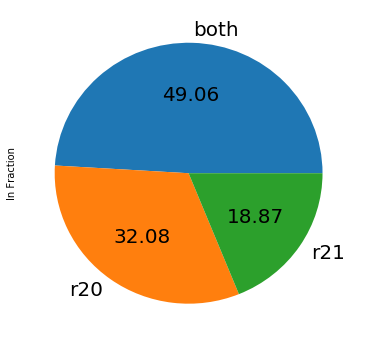

In [33]:
overlap_study(df1, df2, 'm4l_constrained', 240, 245)

[13, 4, 2]
In the mass range [650, 750] GeV, there are 17 events in total in *r20*
After moving to r21...
3 events were lost in r21 due to calibration
      run       event
0  307394  3258577071
1  311365  1817132972
2  298773   159503087
1 events were completely lost in r21
      run      event
0  304211  535662280
1 events were added in r21 due to calibration
      run       event
0  304243  2620628573
1 events were added as new candidates in r21
      run      event
0  306448  332682455


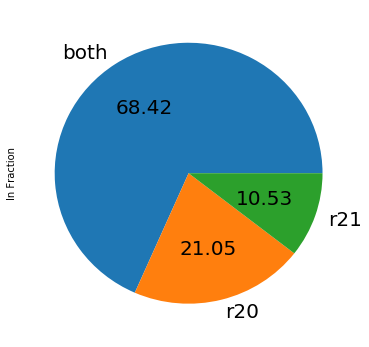

In [22]:
overlap_study(df1, df2, 'm4l_constrained', 650, 750)

In the mass range [240, 245] GeV: 27 events in common, 18 events only in r20, 15 events only in r21.
There are 45 events in total in *r20*
After moving to r21...
11 events were lost in r21 due to migrations
       run       event
0   279685  1615372301
1   310691  2401428334
2   302347  1736601115
3   311481  1623766648
4   305920  1288168195
5   311287  1428026706
6   303266   102288913
7   310634  2807743262
8   307306  1332914033
9   306278  2262538047
10  310634  1576498569
7 events were completely lost in r21
      run       event
0  284484  1172486330
1  305811   666919629
2  311321  3874022225
3  306269  1243855698
4  310468   846981265
5  303208  1044536231
6  310691  2368874478
13 events were added in r21 due to migrations
       run       event
0   281385   554818042
1   280231    76430653
2   284006   486523697
3   280862   500928103
4   302300   119710436
5   303338  3559398152
6   303846  3291591942
7   303846  3909704578
8   304128  4624822497
9   307935  3056646928
10  3

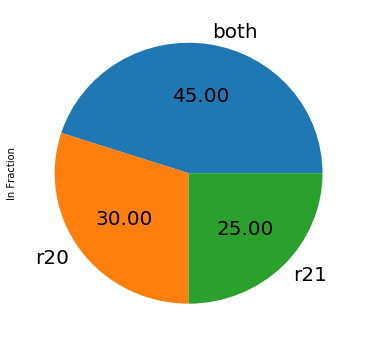

In [35]:
overlap_study(df1, df2, 'm4l_constrained_HM', 240, 245)

In the mass range [650, 750] GeV: 16 events in common, 0 events only in r20, 2 events only in r21.
There are 16 events in total in *r20*
After moving to r21...
0 events were lost in r21 due to migrations
0 events were completely lost in r21
0 events were added in r21 due to migrations
2 events were added as new candidates in r21
      run      event
0  306448  332682455
1  310634  294024423


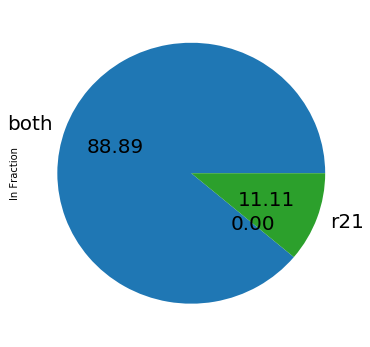

In [36]:
overlap_study(df1, df2, 'm4l_constrained_HM', 650, 750)